In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv('train.csv')

In [71]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [72]:
#null percentage for each column
100*df.isnull().sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

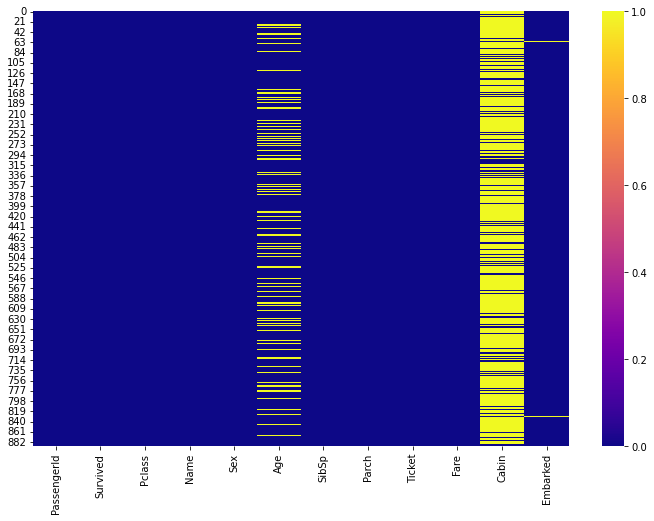

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=True,cmap='plasma')

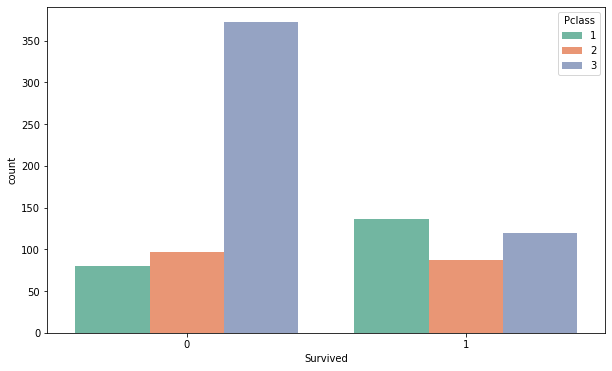

In [74]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x=df['Survived'], hue=df['Pclass'], palette='Set2')
plt.savefig('countplot_pclass_survived.png', dpi=300)

In [75]:
def fill(data,col1,col2):
    for j in list(data[col1].unique()):
        pc_mean=data[(data[col1]==j) & (data[col2].notnull()) ][col2].mean()
        data[(data[col1]==j) & (data[col2].isnull()) ]=data[(data[col1]==j) & (data[col2].isnull()) ].fillna({col2:pc_mean})
    return data

In [76]:
df=fill(df,'Pclass','Age')

<AxesSubplot:>

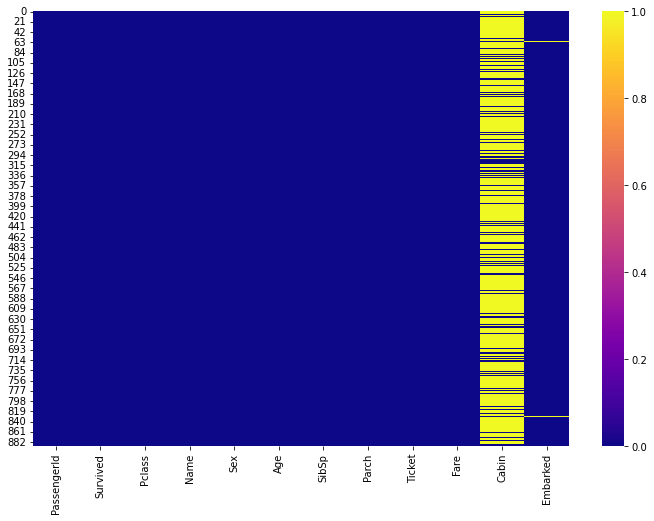

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=True,cmap='plasma')

In [78]:
sex=pd.get_dummies(df['Sex']).drop(columns='female')
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [79]:
df=pd.concat([df,Embarked,sex],axis=1)

In [80]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0


In [81]:
y=df['Survived']
df_train=df.drop(['Name','Ticket','Sex','Embarked','Cabin','PassengerId','Survived'],axis=1)

In [82]:
df_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0


In [83]:
from sklearn.model_selection import train_test_split
[x_train,x_val,y_train,y_val]=train_test_split(df_train,y, test_size=0.25)

In [84]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(max_iter=1000)

In [85]:
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [86]:
y_predict=logistic.predict(x_val)

In [87]:
from sklearn.metrics import classification_report
print (classification_report(y_predict, y_val))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       143
           1       0.70      0.84      0.76        80

    accuracy                           0.81       223
   macro avg       0.80      0.82      0.80       223
weighted avg       0.83      0.81      0.81       223



In [88]:
logistic.score(x_val, y_val)

0.8116591928251121

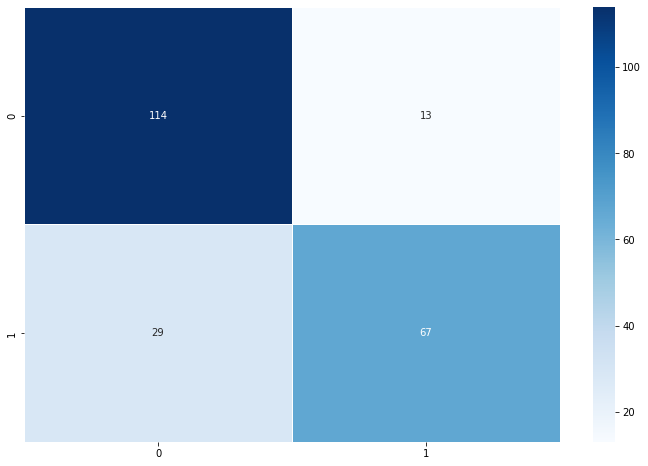

In [89]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, y_predict)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', cmap = "Blues")
plt.savefig('CM.png', dpi=300)

In [90]:
df_test=pd.read_csv('test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [91]:
#null percentage for each column
100*df_test.isnull().sum()/len(df_test)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

<AxesSubplot:>

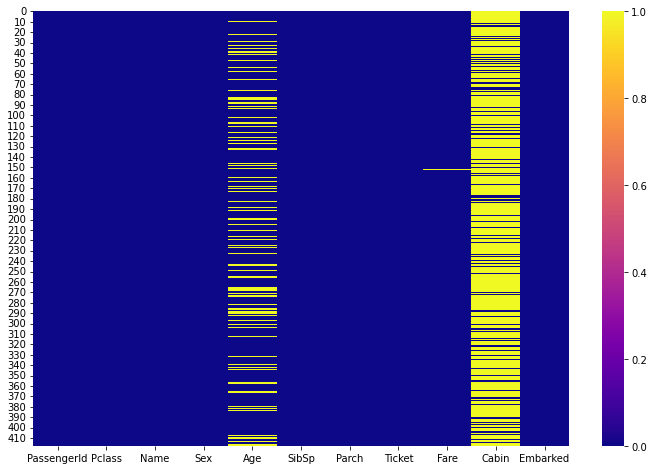

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(df_test.isnull(),cbar=True,cmap='plasma')

In [93]:
df_test=fill(df_test,'Pclass','Fare')
df_test=fill(df_test,'Pclass','Age')

<AxesSubplot:>

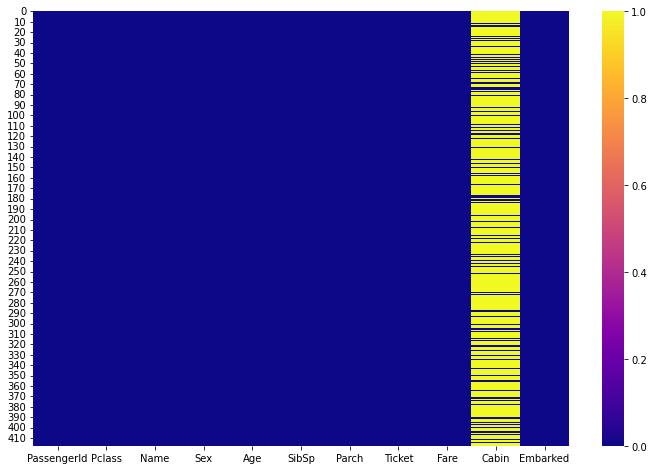

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(df_test.isnull(),cbar=True,cmap='plasma')

In [95]:
sex=pd.get_dummies(df_test['Sex']).drop(columns='female')
Embarked=pd.get_dummies(df_test['Embarked'],drop_first=True)
df_test=pd.concat([df_test,Embarked,sex],axis=1)
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,1


In [96]:
x_test=df_test.drop(['Name','Ticket','Sex','Embarked','Cabin','PassengerId'],axis=1)
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,1,0


In [97]:
y_predict=logistic.predict(x_test)

In [98]:
test_data=pd.merge(x_test,pd.DataFrame(y_predict, columns=['Survived_pred']), left_index=True, right_index=True)
test_data.head(10)

,Pclass,Age,SibSp,Parch,Fare,Q,S,male,Survived_pred
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,1,0,0
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,1,0
4,3,22.0,1,1,12.2875,0,1,0,1
5,3,14.0,0,0,9.2250,0,1,1,0
6,3,30.0,0,0,7.6292,1,0,0,1
7,2,26.0,1,1,29.0000,0,1,1,0
8,3,18.0,0,0,7.2292,0,0,0,1
9,3,21.0,2,0,24.1500,0,1,1,0


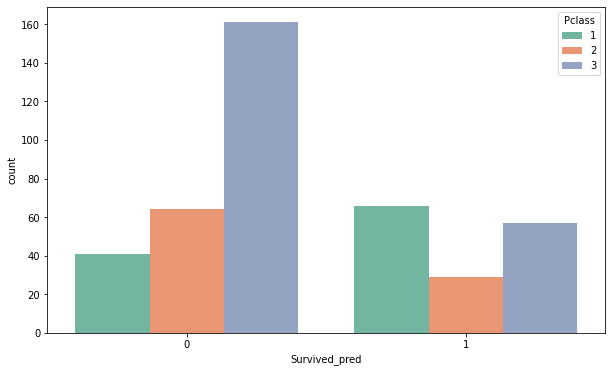

In [99]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x=test_data['Survived_pred'],hue=test_data['Pclass'],palette='Set2')
plt.savefig('countplot_pclass_survived_pred.png', dpi=300)